In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv('adult.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [171]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [172]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [173]:
df.duplicated().sum()

24

In [174]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [175]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [176]:
df1 = df.copy()

In [177]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)
print(cat_cols)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [178]:
df['income'].value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: income, dtype: float64

In [179]:
for i in cat_cols:
    print(f'Feature: {i}')
    print('Value_Counts:',df[i].value_counts())
    print('*'*50)

Feature: workclass
Value_Counts:  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
Feature: education
Value_Counts:  HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
**************************************************
Feature: marital_status
Value_Counts:  Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 

In [180]:
for i in cat_cols:
    print(i)
    print(df[i].unique())
    print('*'*50)

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
**************************************************
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
**************************************************
marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
**************************************************
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
**************************************************
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-

In [181]:
for i in cat_cols:
    df[i] = df[i].apply(lambda x : x.strip())

In [182]:
for i in cat_cols:
    print(i)
    print(df[i].unique())
    print('*'*50)

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
**************************************************
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
**************************************************
marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
**************************************************
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
**************************************************
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
**************

In [183]:
print(df[df['workclass']=='?'].shape)
print(df[df['occupation']=='?'].shape)
print(df[df['native_country']=='?'].shape)

(1836, 15)
(1843, 15)
(582, 15)


In [184]:
df['workclass'].replace('?','None', inplace=True)
df['occupation'].replace('?', 'None', inplace=True)
df['native_country'].replace('?', 'None', inplace=True)

In [185]:
print(df[df['workclass']=='?'].shape)
print(df[df['occupation']=='?'].shape)
print(df[df['native_country']=='?'].shape)

(0, 15)
(0, 15)
(0, 15)


In [186]:
# df['workclass'].replace(' ?', np.NaN, inplace=True)
# df['occupation'].replace(' ?', np.NaN, inplace=True)
# df['native_country'].replace(' ?', np.NaN, inplace=True)

In [187]:
# df.isnull().sum()

In [188]:
df['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
None                 1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [189]:
df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
None                 1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [190]:
df['native_country'].value_counts()

United-States                 29153
Mexico                          639
None                            582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [191]:
# df1 = df.copy()

In [192]:
# df['workclass'].fillna('None', inplace=True)
# df['occupation'].fillna('None', inplace=True)
# df['native_country'].fillna('None', inplace=True)

In [193]:
# df['workclass'].fillna(df['workclass'],mode()[0], inplace=True)
# df['occupation'].fillna(df['occupation'],mode()[0], inplace=True)
# df['native_country'].fillna(df['native_country'],mode()[0], inplace=True)

# df['occupation'].replace(' ?', np.NaN, inplace=True)
# df['native_country'].replace(' ?', np.NaN, inplace=True)

In [194]:
for i in num_cols:
    print(f'Feature {i}')
    print(df[i].value_counts())

Feature age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Feature fnlwgt
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
Feature education_num
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education_num, dtype: int64
Feature capital_gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64
Feature capital_loss
0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1

### EDA

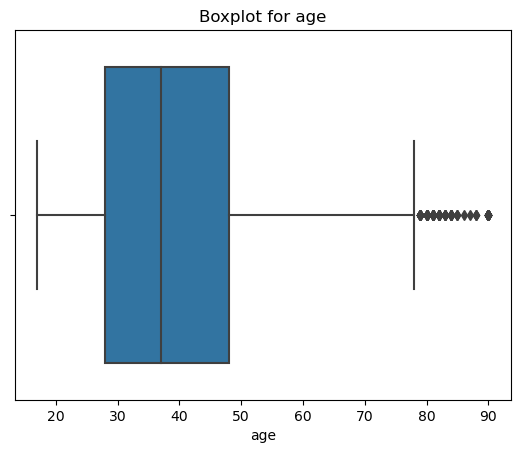

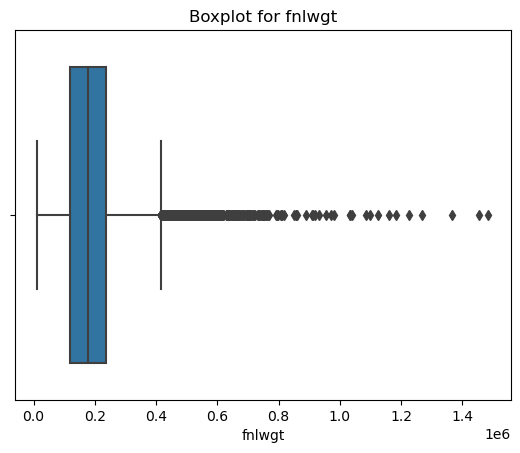

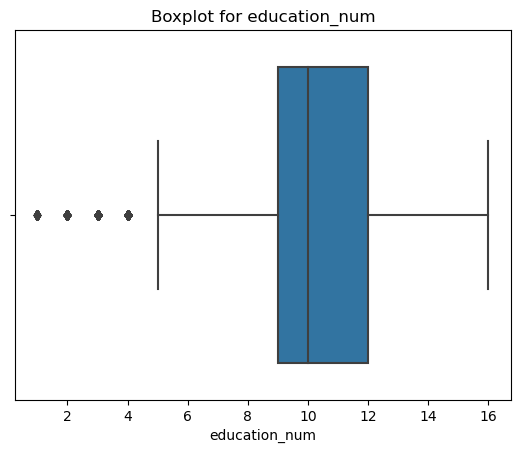

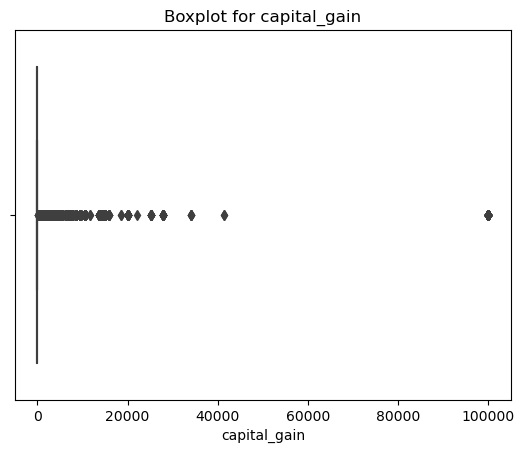

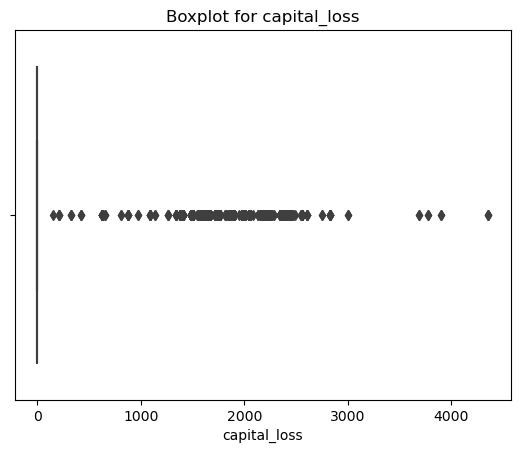

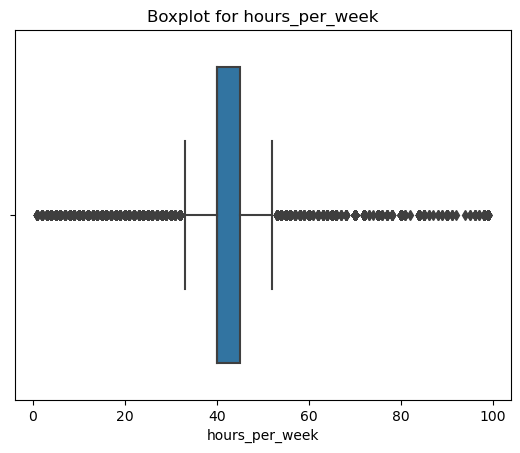

In [195]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [196]:
df['capital_gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

#### Correlation

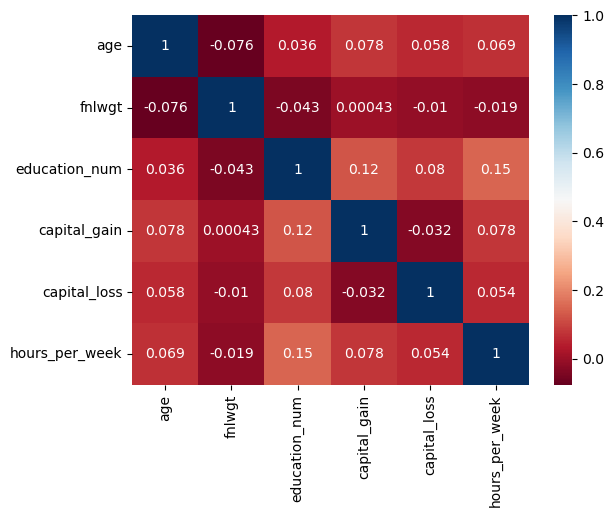

In [197]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Note
Data Contains Outliers

In [198]:
print(cat_cols)
print(cat_cols[:-1])

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')


In [199]:
df_dum = pd.get_dummies(df,columns=cat_cols[:-1],drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(32537, 101)
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_None',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=101)


In [200]:
df_dum.dtypes.value_counts()

uint8     94
int64      6
object     1
dtype: int64

### Select x and y as independent Features

In [201]:
x = df_dum.drop('income',axis=1)
y = df_dum['income']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(32537, 100)
(32537,)


#### Split data into train and test

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22775, 100)
(9762, 100)
(22775,)
(9762,)


### Treating Outliers using Robust Scaler
scaled_val = (x - median)/(Q3-Q1)

In [204]:
from sklearn.preprocessing import RobustScaler

In [205]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train1 = scaler.transform(x_train)
x_test1 = scaler.transform(x_test)

In [208]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [211]:
def eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

### Model Building

In [210]:
from sklearn.naive_bayes import GaussianNB

In [215]:
gnb1 = GaussianNB()
eval_model(gnb1,x_train1,x_test1,y_train,y_test)

Training score 0.8224807903402854
Testing score 0.8163286211841836
Predictions ['>50K' '<=50K' '<=50K' ... '<=50K' '>50K' '>50K']
[[6193 1212]
 [ 581 1776]]
              precision    recall  f1-score   support

       <=50K       0.91      0.84      0.87      7405
        >50K       0.59      0.75      0.66      2357

    accuracy                           0.82      9762
   macro avg       0.75      0.79      0.77      9762
weighted avg       0.84      0.82      0.82      9762



### SMOTE

In [216]:
from imblearn.over_sampling import SMOTE

In [219]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train1,y_train)
print(x_sm.shape)
print(y_sm.shape)

(34586, 100)
(34586,)


In [220]:
gnb2 = GaussianNB()
eval_model(gnb2,x_sm,x_test1,y_sm,y_test)

Training score 0.8148383739085179
Testing score 0.8036263060848187
Predictions ['>50K' '<=50K' '<=50K' ... '<=50K' '>50K' '>50K']
[[5952 1453]
 [ 464 1893]]
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7405
        >50K       0.57      0.80      0.66      2357

    accuracy                           0.80      9762
   macro avg       0.75      0.80      0.76      9762
weighted avg       0.84      0.80      0.81      9762

